## SVM - Support Vector Machine
Decision Tree Technqiue
https://scikit-learn.org/stable/modules/svm.html
https://medium.com/@pinnzonandres/iris-classification-with-svm-on-python-c1b6e833522c
https://www.pycodemates.com/2022/10/classification-of-iris-dataset-using-SVM-in-python.html

In [2]:
#libraries
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(linewidth=400)

In [3]:
#SVM
from sklearn import svm

In [4]:
#data
iris = data('iris')
print(iris.shape)
print(iris.head())

(150, 5)
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa


In [10]:
iris.groupby('Species', as_index=False).size()

,Species,size
0,setosa,50
1,versicolor,50
2,virginica,50


Sepal: The sepal is the part that forms the calyx of a flower, typically function as protection for the flower in bud, and often as support for the petals when in bloom.
- The Sepal lenght on centimeters
- The Sepal Width on centimeters
Petal :Petals are modified leaves that surround the reproductive parts of flowers. We have two variables
- The Petal lenght on centimeters
- The Petal Width on centimeters
The Types of Flowers : Iris is a genus of 260–300 species of flowering plants with showy flowers. It takes its name from the greek word for a rainbow,Iris. In the dataset we have three types of iris:
- Iris Setosa
- Iris Versicolour
- Iris Virginica

In [11]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [42]:
iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


C:\Users\du\AppData\Local\Temp\ipykernel_6724\373993644.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True)


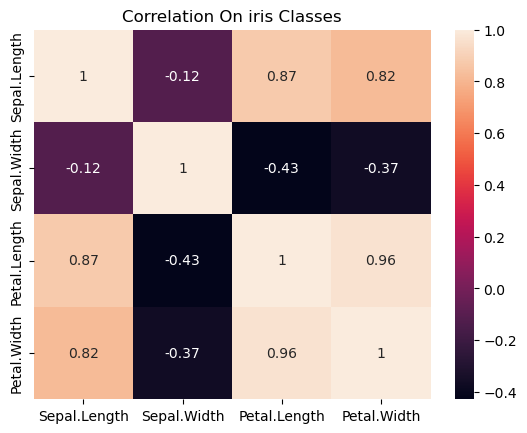

In [15]:
#plot
plt.figure(1)
sns.heatmap(iris.corr(), annot=True)
plt.title('Correlation On iris Classes')
plt.show();

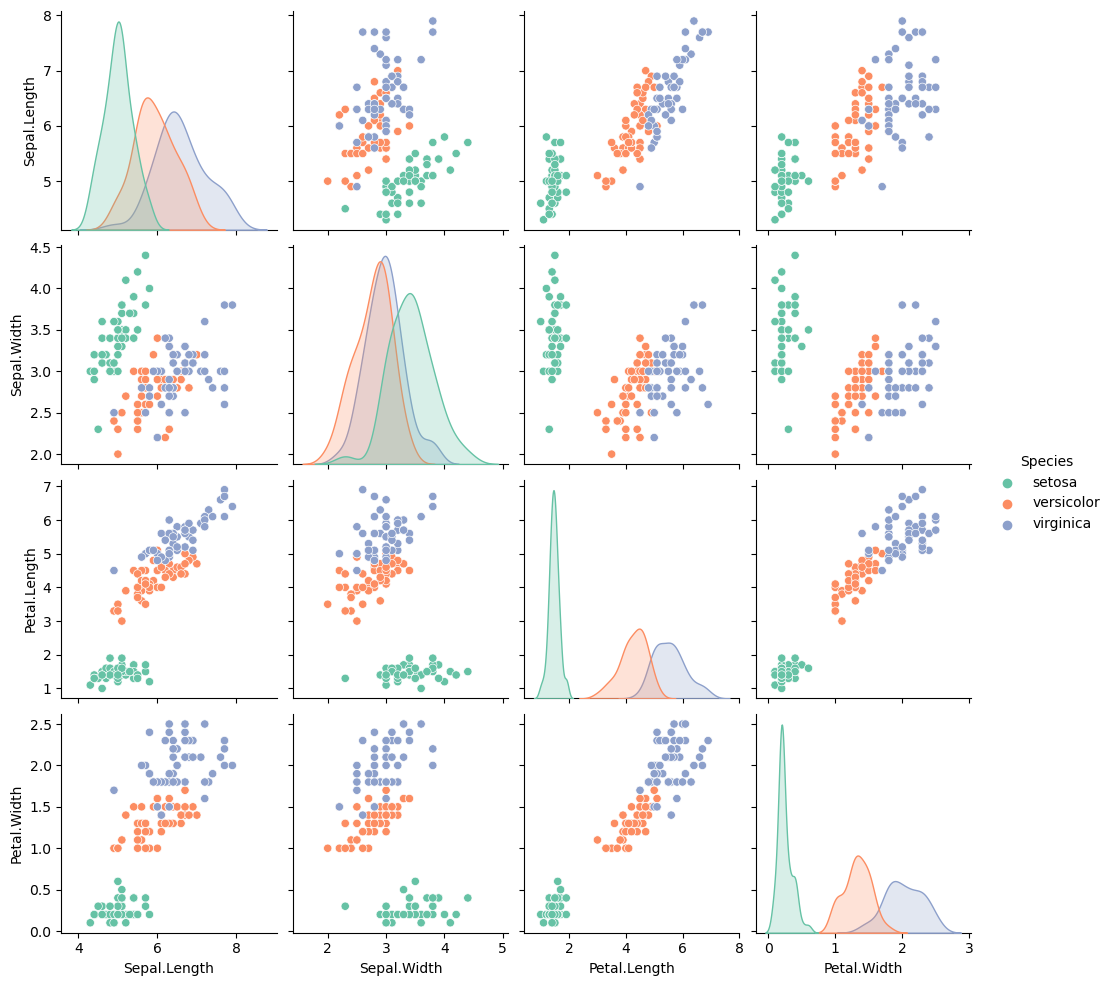

In [52]:
sns.pairplot(data=iris, hue='Species', palette='Set2')

In [16]:
# Split data
X = iris.iloc[:,:-1]
y = iris.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(112, 4) (112,) (38, 4) (38,)


### Classification Model

In [69]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [70]:
#Make the prediction
y_pred = clf.predict(X_test)
#print(np.stack((y_test, y_pred)))
print(pd.DataFrame({'Test':y_test, 'Predicted':y_pred}).head())

         Test   Predicted
0   virginica   virginica
1  versicolor  versicolor
2      setosa      setosa
3   virginica   virginica
4      setosa      setosa


In [71]:
print(clf.support_vectors_[1:5]) # get support vectors

[[5.1 3.3 1.7 0.5]
 [6.3 3.3 4.7 1.6]
 [6.  3.4 4.5 1.6]
 [6.1 3.  4.6 1.4]]


In [39]:
print(clf.support_) # get indices of support vectors
print(clf.n_support_) # get number of support vectors for each class

[ 53  73  14  22  28  36  39  41  70  94  95 103   4  10  16  17  18  19  38  51  60  81]
[ 2 10 10]


### Accuracy

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [46]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.18 %
Standard Deviation: 3.64 %


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# Visualise


In [48]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'], dtype='object')

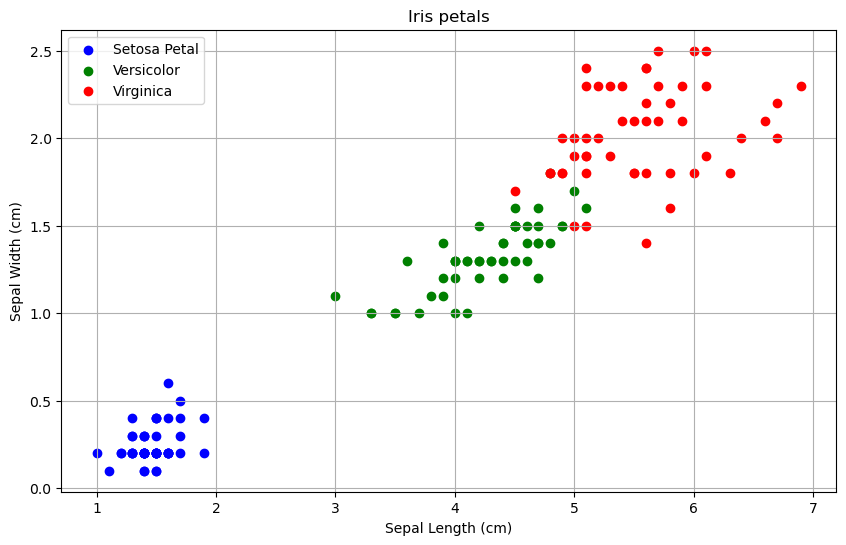

In [72]:
import matplotlib.pyplot as plt

setosa = iris[iris.Species == "setosa"]
versicolor = iris[iris.Species=='versicolor']
virginica = iris[iris.Species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(10, 6) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['Petal.Length'], setosa['Petal.Width'], label="Setosa Petal", facecolor="blue")
ax.scatter(versicolor['Petal.Length'], versicolor['Petal.Width'], label="Versicolor", facecolor="green")
ax.scatter(virginica['Petal.Length'], virginica['Petal.Width'], label="Virginica", facecolor="red")

ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Sepal Width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()
plt.show();

In [76]:
# for 2 class
#from sklearn import datasets, metrics
#metrics.plot_roc_curve(clf, X_test, y_test)
#plt.show();